In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train_dir = 'D:/minip/minip/dataset/train'
test_dir = 'D:/minip/minip/dataset/test'

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Using 20% of training data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 3376 images belonging to 4 classes.


In [5]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 841 images belonging to 4 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)



Found 4217 images belonging to 4 classes.


In [36]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='sigmoid')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

In [37]:
for layer in base_model.layers:
    layer.trainable = False



In [38]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [39]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=40,
    callbacks=[early_stopping]
)


Epoch 1/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.4904 - loss: 1.2354 - val_accuracy: 0.6159 - val_loss: 0.9222
Epoch 2/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.6542 - loss: 0.8254 - val_accuracy: 0.6671 - val_loss: 0.8094
Epoch 3/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.6912 - loss: 0.7323 - val_accuracy: 0.6801 - val_loss: 0.7710
Epoch 4/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.7058 - loss: 0.7200 - val_accuracy: 0.6790 - val_loss: 0.7831
Epoch 5/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.7369 - loss: 0.6564 - val_accuracy: 0.6908 - val_loss: 0.7297
Epoch 6/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.7336 - loss: 0.6407 - val_accuracy: 0.7182 - val_loss: 0.6930
Epoch 7/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.7622 - loss: 0.5946 - val_accuracy: 0.6397 - val_loss: 0.8027
Epoch 8/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.7720 - loss: 0.5753 - val_accu

In [40]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

132/132 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.8503 - loss: 0.4273
Test accuracy: 0.82


In [41]:
model.save('ocular_disease_vgg16_2.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


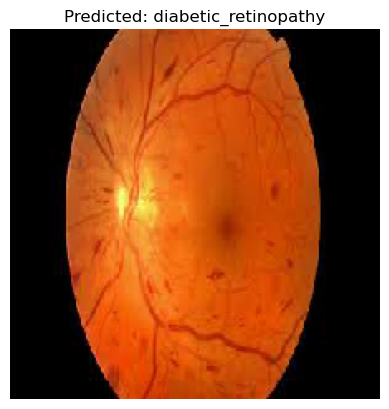

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('ocular_disease_vgg16_2.h5')

# Class labels
class_labels = ['cataract','diabetic_retinopathy','glaucoma','normal']

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    return img_array

def predict_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions, axis=1)[0]
    return class_idx, predictions

def display_prediction(img_path):
    class_idx, predictions = predict_image(img_path)
    img = image.load_img(img_path, target_size=(224, 224))

    plt.imshow(img)
    plt.title(f'Predicted: {class_labels[class_idx]}')
    plt.axis('off')
    plt.show()

# Test with a new image
test_img_path = 'D:/minip/minip/notebooks/images/11.jpeg'
display_prediction(test_img_path)


In [8]:
from tensorflow.keras.models import load_model

model = load_model('ocular_disease_vgg16_2.h5')

#Stats

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have model.predict method to generate predictions on the test set
# Replace test_generator with your test generator
# test_generator = ...

# Generate predictions
predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
class_names = ['cataract', 'diabetic_R', 'glaucoma', 'normal']
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

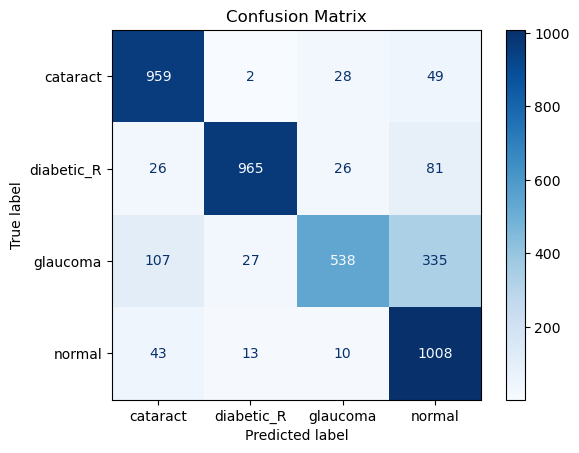

In [ ]:

# Plot confusion matrix
class_names = ['cataract', 'diabetic_R', 'glaucoma', 'normal']
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


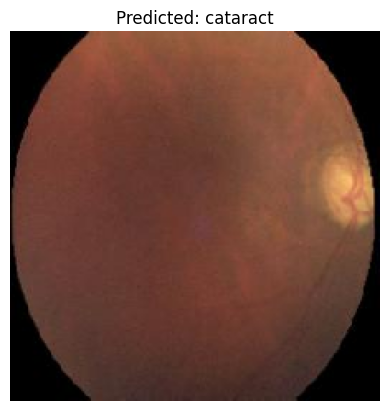

In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('ocular_disease_vgg16_2.h5')

# Class labels
class_labels = ['cataract','diabetic_retinopathy','glaucoma','normal']

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    return img_array

def predict_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions, axis=1)[0]
    return class_idx, predictions

def display_prediction(img_path):
    class_idx, predictions = predict_image(img_path)
    img = image.load_img(img_path, target_size=(224, 224))

    plt.imshow(img)
    plt.title(f'Predicted: {class_labels[class_idx]}')
    plt.axis('off')
    plt.show()

# Test with a new image
test_img_path = 'C:/Users/danis/Downloads/dataset/glaucoma/_28_7296137.jpg'
display_prediction(test_img_path)
